In [1]:
%%javascript
// to avoid scroll in windows
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def calculateVaccinations(g, q, s):
    resG=g.copy()

    vQ=0
    for t in range(373,373+s.shape[0]):
        s[t-373,0]=t
        dayQuotas=[]
        if t <  q[1,0]: 
            vQ=q[0,1]
            for k in range(7):
                dayQuotas.append(q[0,k+2])
        if t >= q[1,0] and t <  q[2,0]:
            vQ=q[1,1]
            for k in range(7):
                dayQuotas.append(q[1,k+2])
        if t >= q[2,0] and t <  q[3,0]:
            vQ=q[2,1]
            for k in range(7):
                dayQuotas.append(q[2,k+2])
        if t >= q[3,0] and t <  q[4,0]:
            vQ=q[3,1]
            for k in range(7):
                dayQuotas.append(q[3,k+2])
        if t >= q[4,0]:
            vQ=q[4,1]
            for k in range(7):
                dayQuotas.append(q[4,k+2])
            
        vQ=vaccinateGroups(vQ,g,dayQuotas,t,1,resG,s)
        vQ=vaccinateGroups(vQ,g,dayQuotas,t,2,resG,s)
        vQ=vaccinateGroups(vQ,g,dayQuotas,t,3,resG,s)
        vQ=vaccinateGroups(vQ,g,dayQuotas,t,4,resG,s)
        vQ=vaccinateGroups(vQ,g,dayQuotas,t,5,resG,s)
        vQ=vaccinateGroups(vQ,g,dayQuotas,t,6,resG,s)
        vQ=vaccinateGroups(vQ,g,dayQuotas,t,7,resG,s)

        
def vaccinateGroups(vQ,g,dQ,t,ng,resG,s):

    groupDayVaccQuantity=round(g[0,ng-1]*dQ[ng-1])
    #print(groupDayVaccQuantity,g[0,ng-1],dQ[ng-1])
    mm=min(resG[0,ng-1],groupDayVaccQuantity)
    #print(resG[0,ng-1],groupDayVaccQuantity,mm)
    
    if mm >=vQ:
        resG[0,ng-1]-=vQ
        vQ=0
        s[t-373,ng]-=resG[0,ng-1]
        return vQ
    else:
        vQ-=mm
        resG[0,ng-1]-=mm
        s[t-373,ng]-=resG[0,ng-1]
        return vQ
    

### Experiment I
    0 seed   66507108
    1 seed   94261776
    0 seedD  44424105

### Experiment I groups

In [4]:
g=[ 133, 84, 240, 1560, 1179, 254, 900 ]

In [5]:
groupM=np.matrix(g)

### Experiment I plain

### quotas

In [6]:
tit="Experiment I plain"
q=\
[
[373,5,0.10,0.10,0.10,0.10,0.10,0.10,0.10],
[433,10,0.10,0.10,0.10,0.10,0.10,0.10,0.10],
[493,10,0.10,0.10,0.10,0.10,0.10,0.10,0.10],
[553,10,0.10,0.10,0.10,0.10,0.10,0.10,0.10],
[613,20,0.10,0.10,0.10,0.10,0.10,0.10,0.10],
]

In [7]:
quotas=pd.DataFrame(q, columns=["day","q","g1","g2", "g3", "g4","g5","g6","g7"])

In [8]:
quotas

day   q   g1   g2   g3   g4   g5   g6   g7
0  373   5  0.1  0.1  0.1  0.1  0.1  0.1  0.1
1  433  10  0.1  0.1  0.1  0.1  0.1  0.1  0.1
2  493  10  0.1  0.1  0.1  0.1  0.1  0.1  0.1
3  553  10  0.1  0.1  0.1  0.1  0.1  0.1  0.1
4  613  20  0.1  0.1  0.1  0.1  0.1  0.1  0.1

In [9]:
quotaM=np.matrix(q)

In [10]:
gSeries=np.zeros((738-373,8))
for i in range(gSeries.shape[0]):
    gSeries[i,0]=373+i
    for j in range(1,8):
        gSeries[i,j]=groupM[0,j-1]

calculateVaccinations(groupM,quotaM,gSeries)

In [11]:
vaccinatedDF=pd.DataFrame(gSeries, columns=["model day","g1 extra frag.","g2 teachers", "g3 frag. workers", 
                                            "g4 workers","g5 frag. people","g6 reg. people","g7 young p."])

In [12]:
vaccinatedDF.astype(int)

model day  g1 extra frag.  g2 teachers  g3 frag. workers  g4 workers  \
0          373               5            0                 0           0   
1          374              10            0                 0           0   
2          375              15            0                 0           0   
3          376              20            0                 0           0   
4          377              25            0                 0           0   
..         ...             ...          ...               ...         ...   
360        733             133           84               240        1560   
361        734             133           84               240        1560   
362        735             133           84               240        1560   
363        736             133           84               240        1560   
364        737             133           84               240        1560   

     g5 frag. people  g6 reg. people  g7 young p.  
0                  0               0            0  
1                  0               0            0  
2                  0               0            0  
3                  0               0            0  
4                  0               0            0  
..               ...             ...          ...  
360             1179             254          900  
361             1179             254          900  
362             1179             254          900  
363             1179             254          900  
364             1179             254          900  

[365 rows x 8 columns]

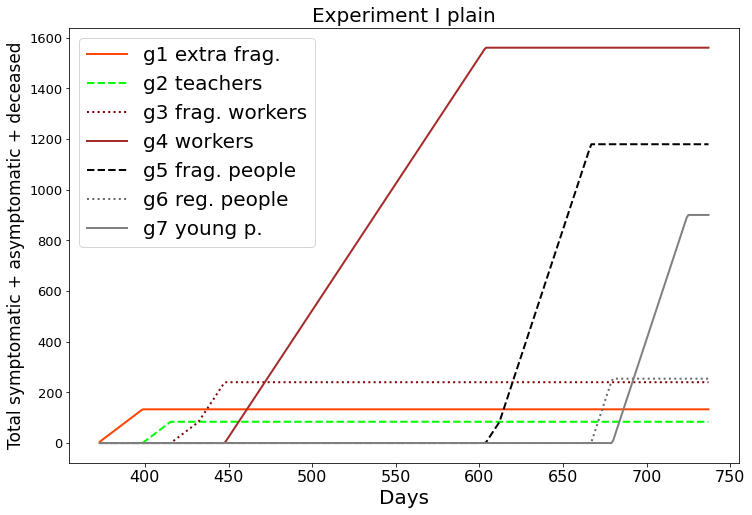

In [15]:
plt.rcParams['figure.figsize'] = [12, 8]
fig=vaccinatedDF.plot(x="model day",color=['orangered','lime','maroon','brown','black','dimgray','gray'],
                  style=["-","--",":","-","--",":","-"], lw=2)#,
                  #title=tit)

#QUI https://www.delftstack.com/it/howto/matplotlib/how-to-set-tick-labels-font-size-in-matplotlib/
plt.xticks(fontsize=16) #qui
plt.yticks(fontsize=13) #qui

#qui https://www.w3schools.com/python/matplotlib_labels.asp
font = {'size':20}
font2 = {'size':17}
#fontt = {'family':'serif','color':'darkred','size':15}

plt.xlabel("Days", fontdict = font) #QUI 
plt.ylabel("Total symptomatic + asymptomatic + deceased", fontdict = font2)  #QUI 

plt.title(tit, fontdict = font) #QUI 
fig.legend(fontsize = 20);


### Experiment I plain plus

### quotas

In [14]:
tit="Experiment I plain plus"
q=\
[
[373,10,0.10,0.10,0.10,0.10,0.10,0.10,0.10],
[433,15,0.10,0.10,0.10,0.10,0.10,0.10,0.10],
[493,25,0.10,0.10,0.10,0.10,0.10,0.10,0.10],
[553,25,0.10,0.10,0.10,0.10,0.10,0.10,0.10],
[613,25,0.10,0.10,0.10,0.10,0.10,0.10,0.10],
]

In [15]:
quotas=pd.DataFrame(q, columns=["day","q","g1","g2", "g3", "g4","g5","g6","g7"])

In [16]:
quotas

day   q   g1   g2   g3   g4   g5   g6   g7
0  373  10  0.1  0.1  0.1  0.1  0.1  0.1  0.1
1  433  15  0.1  0.1  0.1  0.1  0.1  0.1  0.1
2  493  25  0.1  0.1  0.1  0.1  0.1  0.1  0.1
3  553  25  0.1  0.1  0.1  0.1  0.1  0.1  0.1
4  613  25  0.1  0.1  0.1  0.1  0.1  0.1  0.1

In [17]:
quotaM=np.matrix(q)

In [18]:
gSeries=np.zeros((738-373,8))
for i in range(gSeries.shape[0]):
    gSeries[i,0]=373+i
    for j in range(1,8):
        gSeries[i,j]=groupM[0,j-1]

calculateVaccinations(groupM,quotaM,gSeries)

In [19]:
vaccinatedDF=pd.DataFrame(gSeries, columns=["model day","g1 extra frag.","g2 teachers", "g3 frag. workers", 
                                            "g4 workers","g5 frag. people","g6 reg. people","g7 young p."])

In [20]:
vaccinatedDF.astype(int)

model day  g1 extra frag.  g2 teachers  g3 frag. workers  g4 workers  \
0          373              10            0                 0           0   
1          374              20            0                 0           0   
2          375              30            0                 0           0   
3          376              40            0                 0           0   
4          377              50            0                 0           0   
..         ...             ...          ...               ...         ...   
360        733             133           84               240        1560   
361        734             133           84               240        1560   
362        735             133           84               240        1560   
363        736             133           84               240        1560   
364        737             133           84               240        1560   

     g5 frag. people  g6 reg. people  g7 young p.  
0                  0               0            0  
1                  0               0            0  
2                  0               0            0  
3                  0               0            0  
4                  0               0            0  
..               ...             ...          ...  
360             1179             254          900  
361             1179             254          900  
362             1179             254          900  
363             1179             254          900  
364             1179             254          900  

[365 rows x 8 columns]

<AxesSubplot:title={'center':'Experiment I plain plus'}, xlabel='model day'>

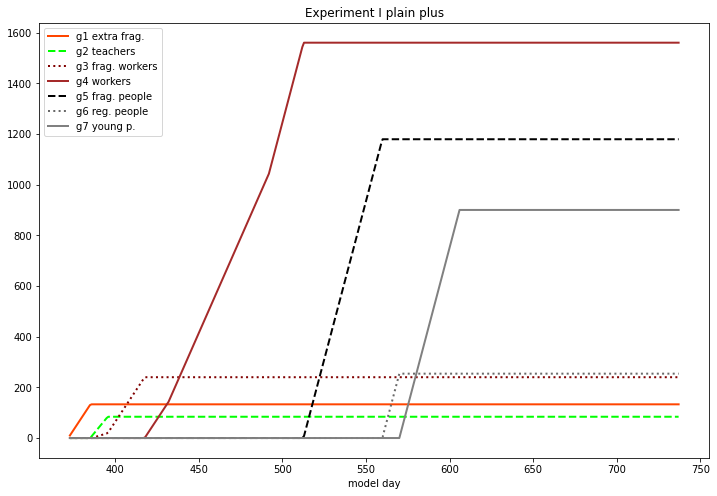

In [21]:
plt.rcParams['figure.figsize'] = [12, 8]
vaccinatedDF.plot(x="model day",color=['orangered','lime','maroon','brown','black','dimgray','gray'],
                  style=["-","--",":","-","--",":","-"], lw=2,
                  title=tit)

### Experiment I wise

### quotas

In [22]:
tit="Experiment I wise"
q=\
[
[373,5,0.10,0.10,0.10,0.00,0.10,0.00,0.00],
[433,10,0.10,0.10,0.10,0.00,0.10,0.00,0.00],
[493,10,0.10,0.10,0.10,0.10,0.10,0.10,0.10],
[553,10,0.10,0.10,0.10,0.10,0.10,0.10,0.10],
[613,20,0.10,0.10,0.10,0.10,0.10,0.10,0.10],
]

In [23]:
quotas=pd.DataFrame(q, columns=["day","q","g1","g2", "g3", "g4","g5","g6","g7"])

In [24]:
quotas

day   q   g1   g2   g3   g4   g5   g6   g7
0  373   5  0.1  0.1  0.1  0.0  0.1  0.0  0.0
1  433  10  0.1  0.1  0.1  0.0  0.1  0.0  0.0
2  493  10  0.1  0.1  0.1  0.1  0.1  0.1  0.1
3  553  10  0.1  0.1  0.1  0.1  0.1  0.1  0.1
4  613  20  0.1  0.1  0.1  0.1  0.1  0.1  0.1

In [25]:
quotaM=np.matrix(q)

In [26]:
gSeries=np.zeros((738-373,8))
for i in range(gSeries.shape[0]):
    gSeries[i,0]=373+i
    for j in range(1,8):
        gSeries[i,j]=groupM[0,j-1]

calculateVaccinations(groupM,quotaM,gSeries)

In [27]:
vaccinatedDF=pd.DataFrame(gSeries, columns=["model day","g1 extra frag.","g2 teachers", "g3 frag. workers", 
                                            "g4 workers","g5 frag. people","g6 reg. people","g7 young p."])

In [28]:
vaccinatedDF.astype(int)

model day  g1 extra frag.  g2 teachers  g3 frag. workers  g4 workers  \
0          373               5            0                 0           0   
1          374              10            0                 0           0   
2          375              15            0                 0           0   
3          376              20            0                 0           0   
4          377              25            0                 0           0   
..         ...             ...          ...               ...         ...   
360        733             133           84               240        1560   
361        734             133           84               240        1560   
362        735             133           84               240        1560   
363        736             133           84               240        1560   
364        737             133           84               240        1560   

     g5 frag. people  g6 reg. people  g7 young p.  
0                  0               0            0  
1                  0               0            0  
2                  0               0            0  
3                  0               0            0  
4                  0               0            0  
..               ...             ...          ...  
360             1179             254          900  
361             1179             254          900  
362             1179             254          900  
363             1179             254          900  
364             1179             254          900  

[365 rows x 8 columns]

<AxesSubplot:title={'center':'Experiment I wise'}, xlabel='model day'>

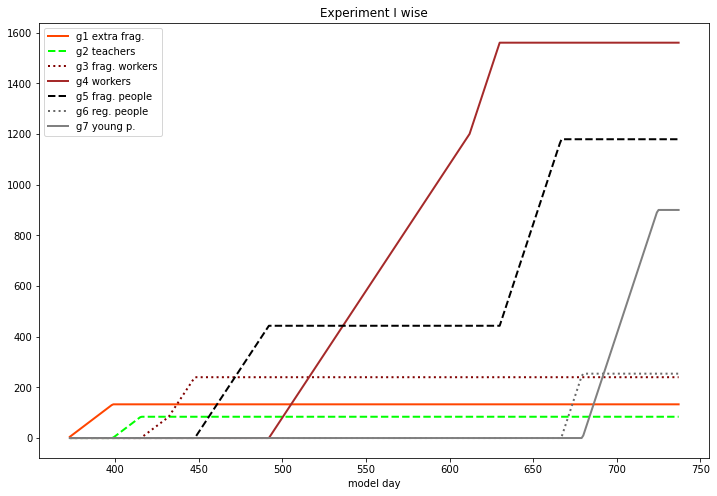

In [29]:
plt.rcParams['figure.figsize'] = [12, 8]
vaccinatedDF.plot(x="model day",color=['orangered','lime','maroon','brown','black','dimgray','gray'],
                  style=["-","--",":","-","--",":","-"], lw=2,
                  title=tit)

### Experiment I wise plus

### quotas

In [30]:
tit="Experiment I wise plus"
q=\
[
[373,10,0.10,0.10,0.10,0.00,0.10,0.00,0.00],
[433,15,0.10,0.10,0.10,0.00,0.10,0.00,0.00],
[493,25,0.10,0.10,0.10,0.10,0.10,0.10,0.10],
[553,25,0.10,0.10,0.10,0.10,0.10,0.10,0.10],
[613,25,0.10,0.10,0.10,0.10,0.10,0.10,0.10],
]

In [31]:
quotas=pd.DataFrame(q, columns=["day","q","g1","g2", "g3", "g4","g5","g6","g7"])

In [32]:
quotas

day   q   g1   g2   g3   g4   g5   g6   g7
0  373  10  0.1  0.1  0.1  0.0  0.1  0.0  0.0
1  433  15  0.1  0.1  0.1  0.0  0.1  0.0  0.0
2  493  25  0.1  0.1  0.1  0.1  0.1  0.1  0.1
3  553  25  0.1  0.1  0.1  0.1  0.1  0.1  0.1
4  613  25  0.1  0.1  0.1  0.1  0.1  0.1  0.1

In [33]:
quotaM=np.matrix(q)

In [34]:
gSeries=np.zeros((738-373,8))
for i in range(gSeries.shape[0]):
    gSeries[i,0]=373+i
    for j in range(1,8):
        gSeries[i,j]=groupM[0,j-1]

calculateVaccinations(groupM,quotaM,gSeries)

In [35]:
vaccinatedDF=pd.DataFrame(gSeries, columns=["model day","g1 extra frag.","g2 teachers", "g3 frag. workers", 
                                            "g4 workers","g5 frag. people","g6 reg. people","g7 young p."])

In [36]:
vaccinatedDF.astype(int)

model day  g1 extra frag.  g2 teachers  g3 frag. workers  g4 workers  \
0          373              10            0                 0           0   
1          374              20            0                 0           0   
2          375              30            0                 0           0   
3          376              40            0                 0           0   
4          377              50            0                 0           0   
..         ...             ...          ...               ...         ...   
360        733             133           84               240        1560   
361        734             133           84               240        1560   
362        735             133           84               240        1560   
363        736             133           84               240        1560   
364        737             133           84               240        1560   

     g5 frag. people  g6 reg. people  g7 young p.  
0                  0               0            0  
1                  0               0            0  
2                  0               0            0  
3                  0               0            0  
4                  0               0            0  
..               ...             ...          ...  
360             1179             254          900  
361             1179             254          900  
362             1179             254          900  
363             1179             254          900  
364             1179             254          900  

[365 rows x 8 columns]

<AxesSubplot:title={'center':'Experiment I wise plus'}, xlabel='model day'>

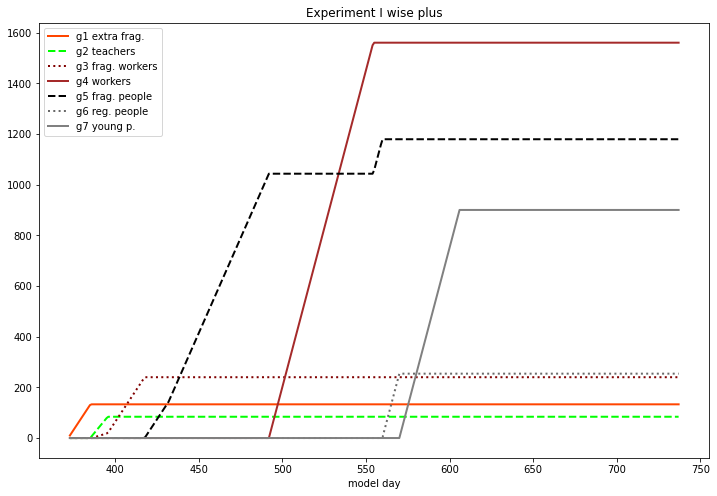

In [37]:
plt.rcParams['figure.figsize'] = [12, 8]
vaccinatedDF.plot(x="model day",color=['orangered','lime','maroon','brown','black','dimgray','gray'],
                  style=["-","--",":","-","--",":","-"], lw=2,
                  title=tit)

### Experiment I GA 1

### quotas

In [38]:
tit="Experiment I GA 1"
q=\
[
[373,5,0.01,0,0,0.79,0.18,0.38,0.19],
[433,10,0.94,0.06,0.32,0.54,0.19,0.83,0.5],
[493,10,0.97,0.97,0.74,0.79,0.2,0.14,0.52],
[553,10,0.98,0.83,0.02,0.39,0.99,0.04,0.48],
[613,20,0.52,0.01,0.83,0.6,1,0.27,0.9],
]

In [39]:
quotas=pd.DataFrame(q, columns=["day","q","g1","g2", "g3", "g4","g5","g6","g7"])

In [40]:
quotas

day   q    g1    g2    g3    g4    g5    g6    g7
0  373   5  0.01  0.00  0.00  0.79  0.18  0.38  0.19
1  433  10  0.94  0.06  0.32  0.54  0.19  0.83  0.50
2  493  10  0.97  0.97  0.74  0.79  0.20  0.14  0.52
3  553  10  0.98  0.83  0.02  0.39  0.99  0.04  0.48
4  613  20  0.52  0.01  0.83  0.60  1.00  0.27  0.90

In [41]:
quotaM=np.matrix(q)

In [42]:
gSeries=np.zeros((738-373,8))
for i in range(gSeries.shape[0]):
    gSeries[i,0]=373+i
    for j in range(1,8):
        gSeries[i,j]=groupM[0,j-1]

calculateVaccinations(groupM,quotaM,gSeries)

In [43]:
vaccinatedDF=pd.DataFrame(gSeries, columns=["model day","g1 extra frag.","g2 teachers", "g3 frag. workers", 
                                            "g4 workers","g5 frag. people","g6 reg. people","g7 young p."])

In [44]:
#pd.set_option('display.max_rows',737-372)
vaccinatedDF.astype(int)

model day  g1 extra frag.  g2 teachers  g3 frag. workers  g4 workers  \
0          373               1            0                 0           4   
1          374               2            0                 0           8   
2          375               3            0                 0          12   
3          376               4            0                 0          16   
4          377               5            0                 0          20   
..         ...             ...          ...               ...         ...   
360        733             133           84               240        1560   
361        734             133           84               240        1560   
362        735             133           84               240        1560   
363        736             133           84               240        1560   
364        737             133           84               240        1560   

     g5 frag. people  g6 reg. people  g7 young p.  
0                  0               0            0  
1                  0               0            0  
2                  0               0            0  
3                  0               0            0  
4                  0               0            0  
..               ...             ...          ...  
360             1179             254          900  
361             1179             254          900  
362             1179             254          900  
363             1179             254          900  
364             1179             254          900  

[365 rows x 8 columns]

<AxesSubplot:title={'center':'Experiment I GA 1'}, xlabel='model day'>

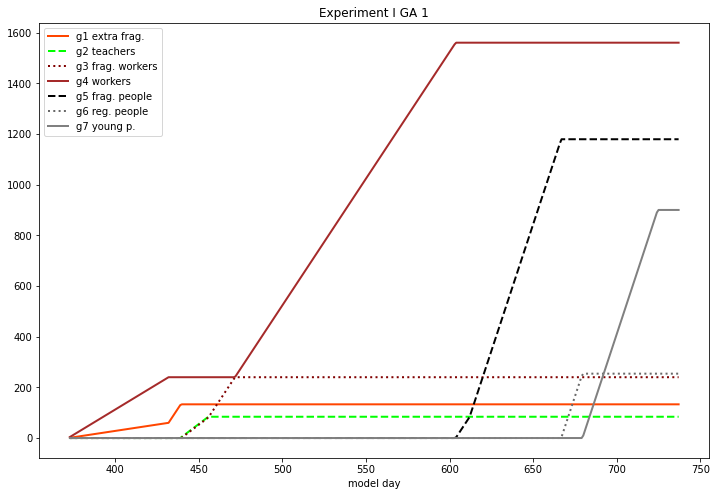

In [45]:
plt.rcParams['figure.figsize'] = [12, 8]
vaccinatedDF.plot(x="model day",color=['orangered','lime','maroon','brown','black','dimgray','gray'],
                  style=["-","--",":","-","--",":","-"], lw=2,
                  title=tit)

### Experiment I GA 0

### quotas

In [46]:
tit="Experiment I GA 0"
q=\
[
[373,5,0.01,0,0,0.89,0.31,0.98,0.25],
[433,10,0.17,0.64,0.08,0.14,0.22,0.79,0.48],
[493,10,0.11,0.87,0.4,0.46,0.45,0.34,0.14],
[553,10,0.23,0.82,0.14,0.16,0.35,0.59,0.45],
[613,20,0.35,0.43,0.65,0.54,0.79,0.66,0.59],
]

In [47]:
quotas=pd.DataFrame(q, columns=["day","q","g1","g2", "g3", "g4","g5","g6","g7"])

In [48]:
quotas

day   q    g1    g2    g3    g4    g5    g6    g7
0  373   5  0.01  0.00  0.00  0.89  0.31  0.98  0.25
1  433  10  0.17  0.64  0.08  0.14  0.22  0.79  0.48
2  493  10  0.11  0.87  0.40  0.46  0.45  0.34  0.14
3  553  10  0.23  0.82  0.14  0.16  0.35  0.59  0.45
4  613  20  0.35  0.43  0.65  0.54  0.79  0.66  0.59

In [49]:
quotaM=np.matrix(q)

In [50]:
gSeries=np.zeros((738-373,8))
for i in range(gSeries.shape[0]):
    gSeries[i,0]=373+i
    for j in range(1,8):
        gSeries[i,j]=groupM[0,j-1]

calculateVaccinations(groupM,quotaM,gSeries)

In [51]:
vaccinatedDF=pd.DataFrame(gSeries, columns=["model day","g1 extra frag.","g2 teachers", "g3 frag. workers", 
                                            "g4 workers","g5 frag. people","g6 reg. people","g7 young p."])

In [52]:
#pd.set_option('display.max_rows',737-372)
vaccinatedDF.astype(int)

model day  g1 extra frag.  g2 teachers  g3 frag. workers  g4 workers  \
0          373               1            0                 0           4   
1          374               2            0                 0           8   
2          375               3            0                 0          12   
3          376               4            0                 0          16   
4          377               5            0                 0          20   
..         ...             ...          ...               ...         ...   
360        733             133           84               240        1560   
361        734             133           84               240        1560   
362        735             133           84               240        1560   
363        736             133           84               240        1560   
364        737             133           84               240        1560   

     g5 frag. people  g6 reg. people  g7 young p.  
0                  0               0            0  
1                  0               0            0  
2                  0               0            0  
3                  0               0            0  
4                  0               0            0  
..               ...             ...          ...  
360             1179             254          900  
361             1179             254          900  
362             1179             254          900  
363             1179             254          900  
364             1179             254          900  

[365 rows x 8 columns]

<AxesSubplot:title={'center':'Experiment I GA 0'}, xlabel='model day'>

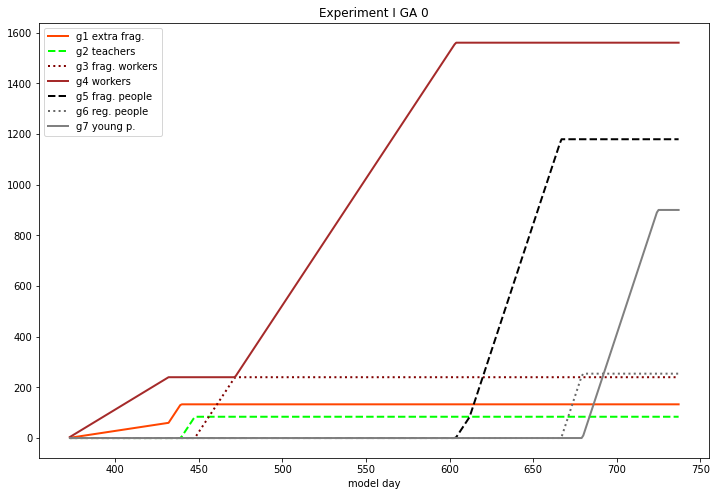

In [53]:
plt.rcParams['figure.figsize'] = [12, 8]
vaccinatedDF.plot(x="model day",color=['orangered','lime','maroon','brown','black','dimgray','gray'],
                  style=["-","--",":","-","--",":","-"], lw=2,
                  title=tit)

### Experiment I GA 0.5

### quotas

In [54]:
tit="Experiment I GA 0,5"
q=\
[
[373,5,0.11,0.79,0.54,0.63,0.33,0.62,0.85],
[433,10,0.16,0.25,0.22,0.28,0.21,0.85,0.04],
[493,10,0.65,0.67,0.48,0.64,0.75,0.14,0.97],
[553,10,0.36,0.45,0.59,0,0.44,0.74,0.6],
[613,20,0.22,0.41,0.63,0,0.41,0.44,0.48],
]

In [55]:
quotas=pd.DataFrame(q, columns=["day","q","g1","g2", "g3", "g4","g5","g6","g7"])

In [56]:
quotas

day   q    g1    g2    g3    g4    g5    g6    g7
0  373   5  0.11  0.79  0.54  0.63  0.33  0.62  0.85
1  433  10  0.16  0.25  0.22  0.28  0.21  0.85  0.04
2  493  10  0.65  0.67  0.48  0.64  0.75  0.14  0.97
3  553  10  0.36  0.45  0.59  0.00  0.44  0.74  0.60
4  613  20  0.22  0.41  0.63  0.00  0.41  0.44  0.48

In [57]:
quotaM=np.matrix(q)

In [58]:
gSeries=np.zeros((738-373,8))
for i in range(gSeries.shape[0]):
    gSeries[i,0]=373+i
    for j in range(1,8):
        gSeries[i,j]=groupM[0,j-1]

calculateVaccinations(groupM,quotaM,gSeries)

In [59]:
vaccinatedDF=pd.DataFrame(gSeries, columns=["model day","g1 extra frag.","g2 teachers", "g3 frag. workers", 
                                            "g4 workers","g5 frag. people","g6 reg. people","g7 young p."])

In [60]:
#pd.set_option('display.max_rows',737-372)
vaccinatedDF.astype(int)

model day  g1 extra frag.  g2 teachers  g3 frag. workers  g4 workers  \
0          373               5            0                 0           0   
1          374              10            0                 0           0   
2          375              15            0                 0           0   
3          376              20            0                 0           0   
4          377              25            0                 0           0   
..         ...             ...          ...               ...         ...   
360        733             133           84               240        1043   
361        734             133           84               240        1043   
362        735             133           84               240        1043   
363        736             133           84               240        1043   
364        737             133           84               240        1043   

     g5 frag. people  g6 reg. people  g7 young p.  
0                  0               0            0  
1                  0               0            0  
2                  0               0            0  
3                  0               0            0  
4                  0               0            0  
..               ...             ...          ...  
360             1179             254          900  
361             1179             254          900  
362             1179             254          900  
363             1179             254          900  
364             1179             254          900  

[365 rows x 8 columns]

<AxesSubplot:title={'center':'Experiment I GA 0,5'}, xlabel='model day'>

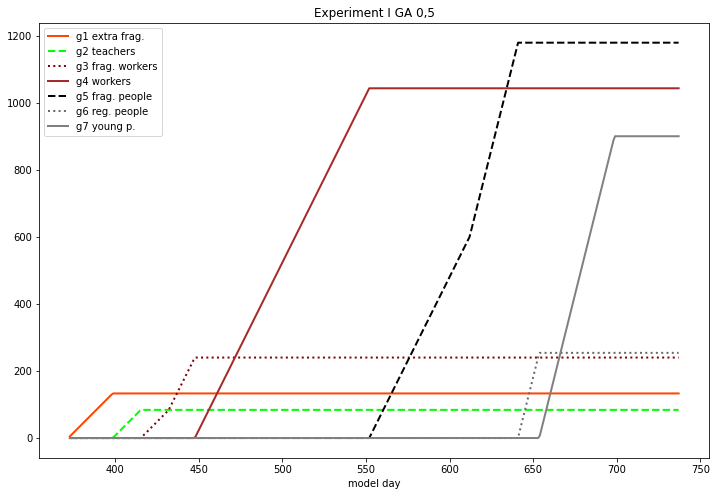

In [61]:
plt.rcParams['figure.figsize'] = [12, 8]
vaccinatedDF.plot(x="model day",color=['orangered','lime','maroon','brown','black','dimgray','gray'],
                  style=["-","--",":","-","--",":","-"], lw=2,
                  title=tit)